In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 200
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=30

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "ASL_Alphabet_Dataset",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20179 files belonging to 2 classes.


In [7]:
class_names = dataset.class_names
class_names

['asl_alphabet_test', 'asl_alphabet_train']

In [9]:
len(dataset)

631

In [11]:
68*32

2176

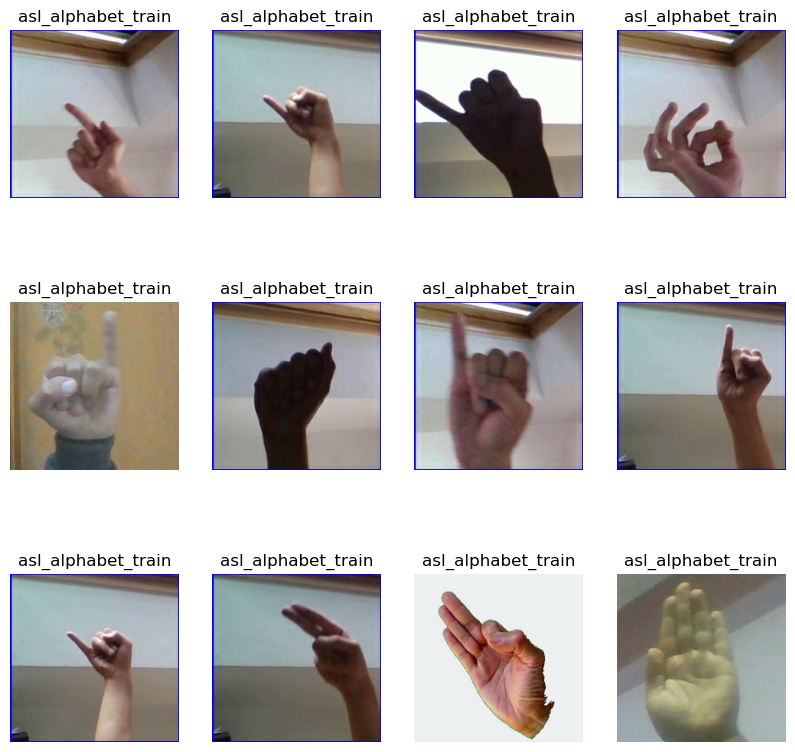

In [13]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [15]:
len(dataset)

631

In [17]:
train_size = 0.8
len(dataset)*train_size

504.8

In [19]:
train_ds= dataset.take(1913)
len(train_ds)

631

In [21]:
test_ds = dataset.skip(1913)
len(test_ds)

0

In [23]:
val_size=0.1
len(dataset)*val_size

63.1

In [25]:
val_ds = test_ds.take(6)
len(val_ds)

0

In [27]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [29]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size =int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [31]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [33]:
len(train_ds)

504

In [35]:
len(val_ds)

63

In [37]:
len(test_ds)

64

In [39]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [41]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/199)
])

In [43]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [45]:
input_shape = (BATCH_SIZE ,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation ='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape= input_shape)

C:\Users\kshit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 200, 200, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 200, 200, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 198, 198, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 99, 99, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 97, 97, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 48, 48, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 46, 46, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 23, 23, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 21, 21, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 10, 10, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 8, 8, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 4, 4, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 2, 2, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model. compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [51]:
history= model. fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
504/504 ━━━━━━━━━━━━━━━━━━━━ 717s 1s/step - accuracy: 0.9927 - loss: 0.0729 - val_accuracy: 1.0000 - val_loss: 1.3909e-04
Epoch 2/30
504/504 ━━━━━━━━━━━━━━━━━━━━ 680s 1s/step - accuracy: 0.9988 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 3/30
504/504 ━━━━━━━━━━━━━━━━━━━━ 547s 1s/step - accuracy: 0.9987 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 0.0212
Epoch 4/30
504/504 ━━━━━━━━━━━━━━━━━━━━ 552s 1s/step - accuracy: 0.9989 - loss: 0.0193 - val_accuracy: 1.0000 - val_loss: 6.3634e-04
Epoch 5/30
504/504 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.9991 - loss: 0.0118 - val_accuracy: 1.0000 - val_loss: 6.3815e-04
Epoch 6/30
504/504 ━━━━━━━━━━━━━━━━━━━━ 547s 1s/step - accuracy: 0.9988 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/30
504/504 ━━━━━━━━━━━━━━━━━━━━ 539s 1s/step - accuracy: 0.9982 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 8/30
504/504 ━━━━━━━━━━━━━━━━━━━━ 537s 1s/step - accuracy: 0.9989 - loss: 0.011

In [53]:
scores= model.evaluate(test_ds)

64/64 ━━━━━━━━━━━━━━━━━━━━ 86s 294ms/step - accuracy: 0.9995 - loss: 0.0043


In [55]:
scores


[0.0042167301289737225, 0.99951171875]

In [57]:
history.params


{'verbose': 1, 'epochs': 30, 'steps': 504}

In [59]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [61]:
history.history['accuracy']

[0.9979522228240967,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.9987589120864868,
 0.9968352317810059,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.998820960521698,
 0.997704029083252]

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

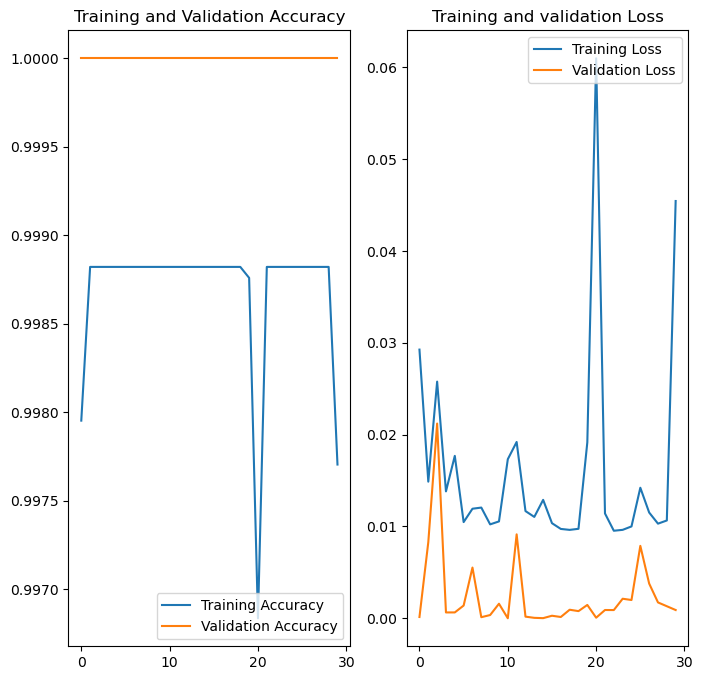

In [65]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation Loss')
plt.show()

first image to predict
first image's actual label: asl_alphabet_train
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
predicted label: asl_alphabet_train


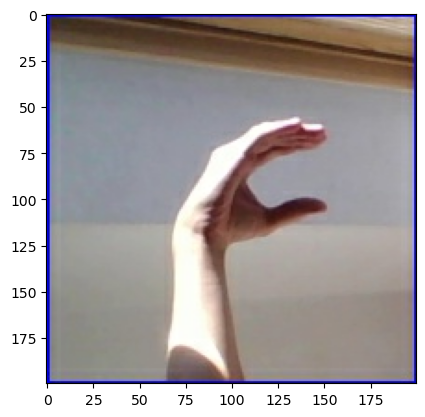

In [71]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()  

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])

batch_prediction = model.predict(images_batch)
print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [73]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) 
     
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


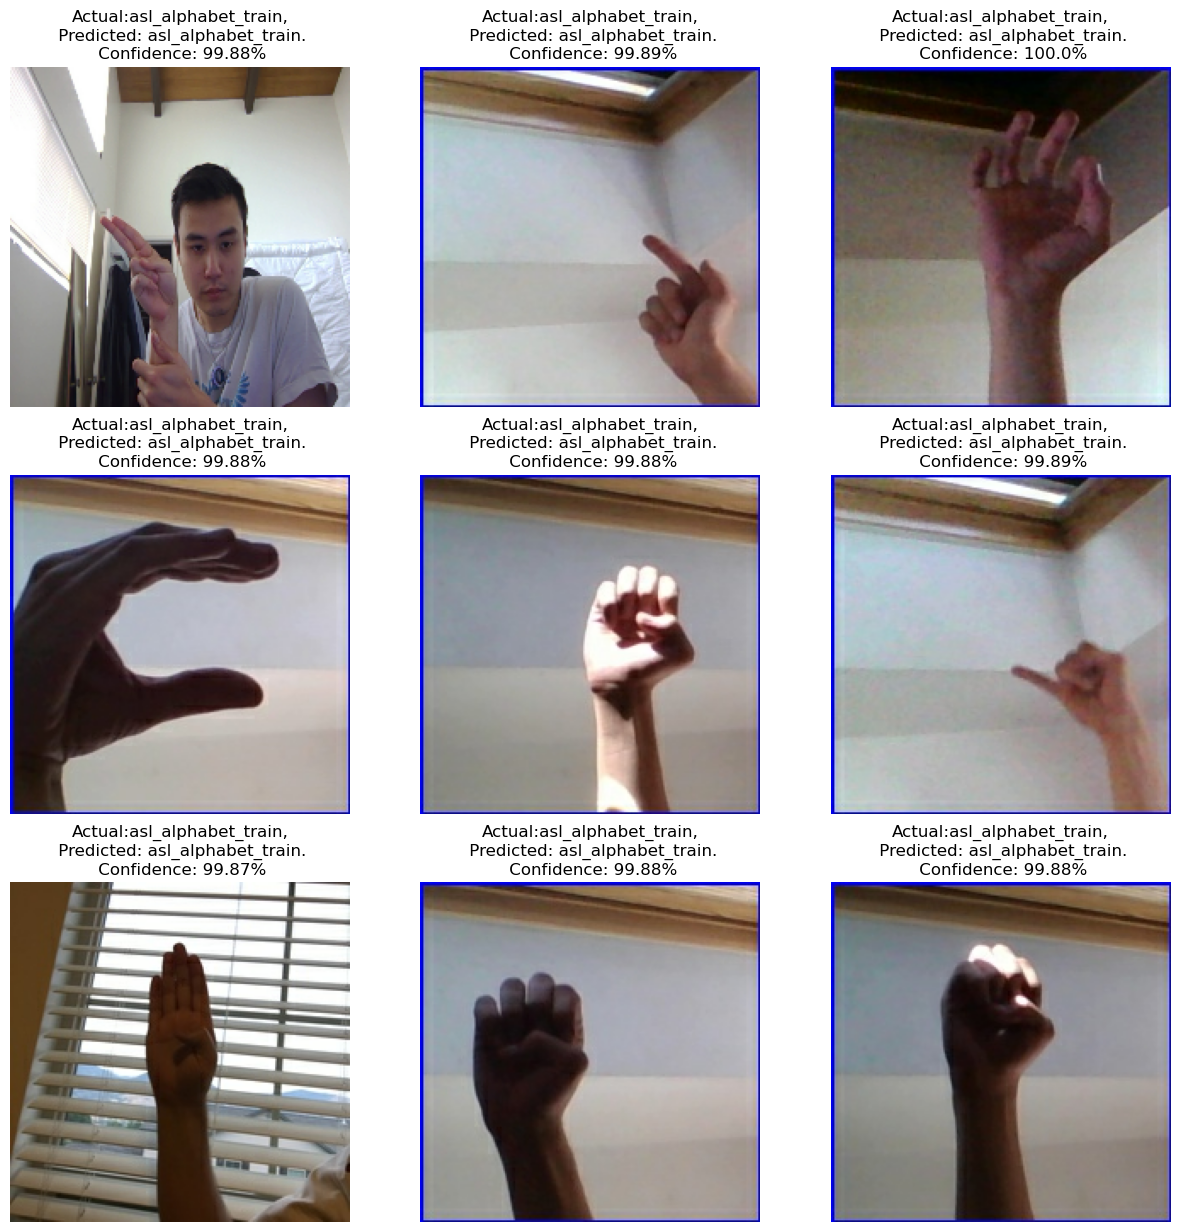

In [75]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [8]:
model.save('model.keras')

In [10]:
model.save('model.keras', include_optimizer=False)

In [2]:
model_version = 1
model.save(f"../model/{model_version}.keras")

NameError: name 'model' is not defined

In [6]:
model = load_model('model.keras')
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
from tensorflow.keras.models import load_model

model = load_model('model.keras')

In [81]:
model_version=2
model.save(f"../models/{model_version}.keras")

In [83]:
import os
os.listdir("../models")

['1.keras', '2.keras']

for saving
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model("models/1.keras")

# Recompile if needed
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

tomorrow
# Continue with your work using the loaded model
predictions = model.predict(new_data)
# or
model.fit(more_training_data, more_labels, epochs=5)  # Continue training